<a href="https://colab.research.google.com/github/ujjwalbb30/Azure_Nanodegree_AutoML_Classification/blob/master/notebooks/Step_2_Basic_EDA_Ujjwal_PF10610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA 606 : Capstone Project**
##**Course Instructor: Dr. Chaojie Wang**
>**Data Science Department**

>**University of Maryland, Baltimore County**

###**Submitted By: Ujjwal**
>**UMBC ID: PF10610**

##**Basic Exploratory Data Analysis (EDA)**

I will perform tokenization, stemming, lemmatization and remove stop words.

I will also view word cloud for each label.

###**Installing Required Libraries**

In [ ]:
!pip install wordcloud

###**Importing Required Libraries**

In [ ]:
# importing required dependencies

# importing pandas, numpy, random, matplotlib and their required modules
import pandas as pd
import numpy as np
import random
from numpy.random import seed
seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# importing other required libraries
from tqdm.notebook import tqdm
from wordcloud import WordCloud, STOPWORDS

###**Mounting the Drive**

In [ ]:
# mounting the drive to access data files
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# defining the path of data in drive (path to copy the data from)
# defining the path where the data should be copied
drive_path = '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset'
local_path = '/content'

# copying the data from drive to machine
!cp -av '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' '/content'

####**Generating Word Clouds**

In [ ]:
# importing the dataframe
imgpath_text_df = pd.read_csv('/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Data_2/imgpath_text_df.csv')
display(imgpath_text_df)

,label,path,text,clean_text
0,Note,/content/Dataset/Note/2073440248.jpg,\n\nARTHUR C. PADOAN\n\nerz0rVyelo?\n\nIV G7 ...,arthur c padoan erz rvyelo iv g
1,Note,/content/Dataset/Note/2048858141.jpg,et ao\n\ncacgion Cas PY Heap\n\n \n\n \n\n \n\...,et ao cacgion cas py heap
2,Note,/content/Dataset/Note/10384492.jpg,\n\n_ PPD AY pid Be\n\n7 Cane CO cirneten PP ...,ppd ay pid be cane co cirneten pp mae a pf e a...
3,Note,/content/Dataset/Note/71460901.jpg,190242521\n\nPRODUC]\n\n \n\nED FROM\n\nB&W WE...,produc ed from b w web site the health policy ...
4,Note,/content/Dataset/Note/1003403894_1003403895.jpg,\n\n \n\n \n\n \n\n \n\nof .\n\nSLZESE STUP...,of slzese stupts cover bu do faw froo o lavwel...
...,...,...,...,...
3487,Report,/content/Dataset/Report/507963083_507963090.jpg,104\n\nDr. Rainer Wendeborn/Thomas Leutner\nRH...,dr rainer wendeborn thomas leutner rhone poule...
3488,Report,/content/Dataset/Report/507767713_507767722.jpg,\n\n \n\nSPECIAL PUBLIC RELATIONS PROGRAMS\n\...,special public relations programs en backgroun...
3489,Report,/content/Dataset/Report/507745286_507745288.jpg,"\n\n \n\n \n\n& Tobacco Company Cot, Me ...",tobacco company cot me a bhi usyi horizon reta...
3490,Report,/content/Dataset/Report/510907182_510907183.jpg,MARYLAND TOBACCO\n4 .\n\nSOUTHERN MARYLAND TOB...,maryland tobacco southern maryland tobacco boa...


In [ ]:
# creating list of labels for creating wordcloud in iterations for each label
labels = list(imgpath_text_df['label'].unique())
display(labels)

['Note',
 'Form',
 'Email',
 'Letter',
 'News',
 'ADVE',
 'Memo',
 'Resume',
 'Scientific',
 'Report']

In [ ]:
# checking NaNs and replacing any with ' ' string
print('Number of NaN values in clean_text column:\n',imgpath_text_df['clean_text'].isnull().sum())

# filling NaNs with ' '
imgpath_text_df.fillna(' ', inplace=True)

# viewing NaNs again
print('Number of NaN values in clean_text column after replacing:\n',imgpath_text_df['clean_text'].isnull().sum())

Number of NaN values in clean_text column:
 21
Number of NaN values in clean_text column after replacing:
 0


In [ ]:
# Defining a function to plot word cloud
def wordcloud_plot(wordcloud,label):
  # Set figure size
  plt.figure(figsize=(10, 10))
  plt.title('For '+label)
  # Display image
  plt.imshow(wordcloud) 
  # No axis details
  plt.axis("off");

  0%|          | 0/10 [00:00<?, ?it/s]

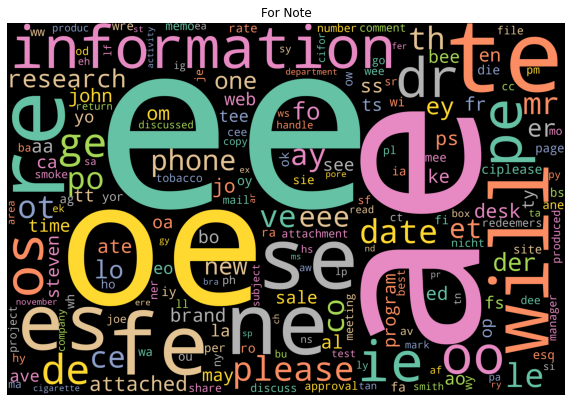

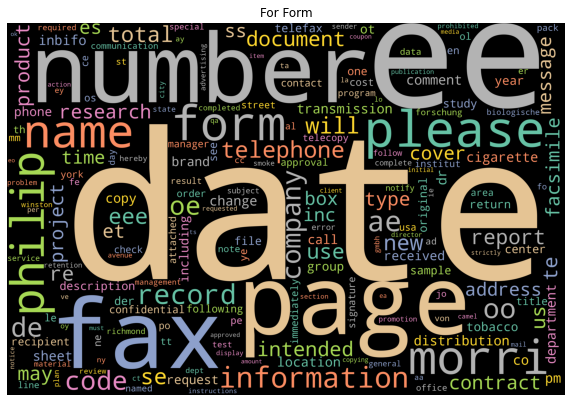

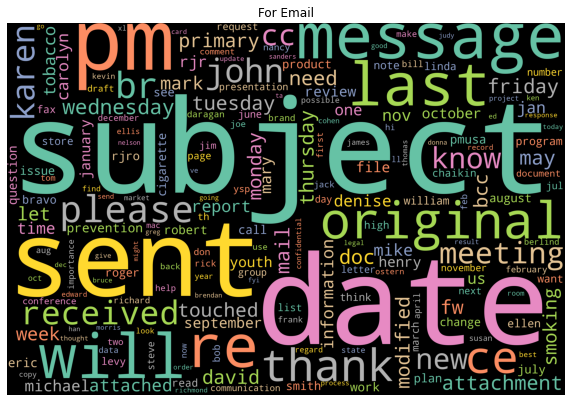

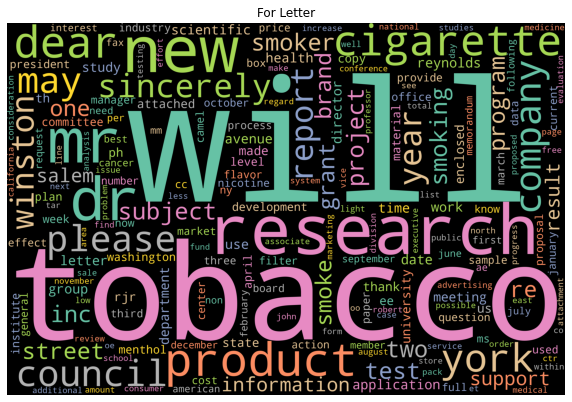

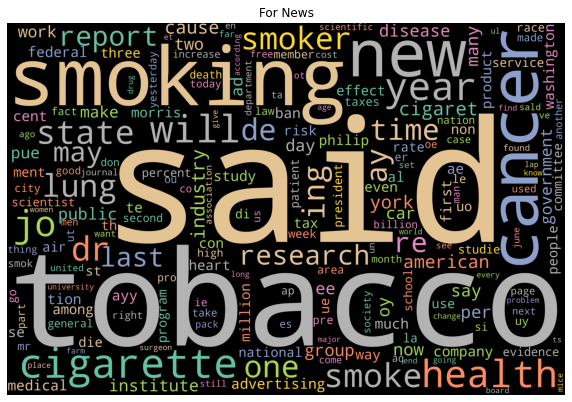

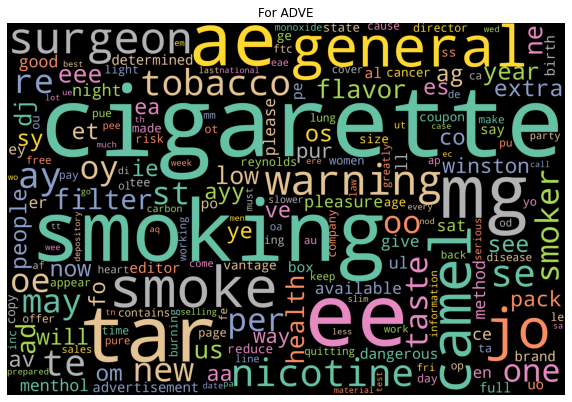

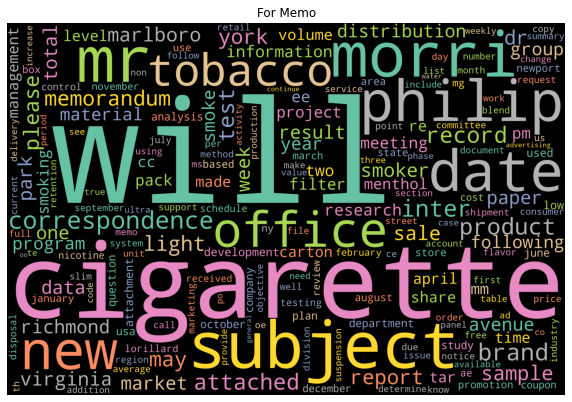

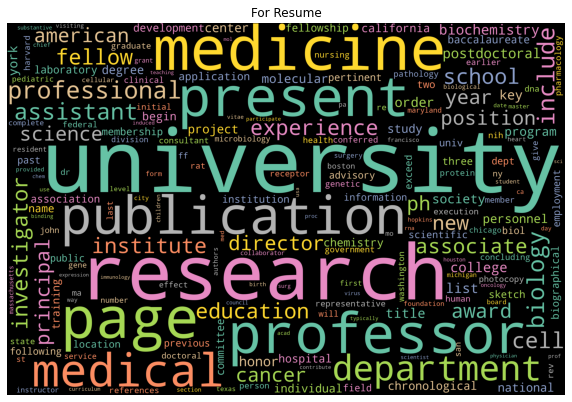

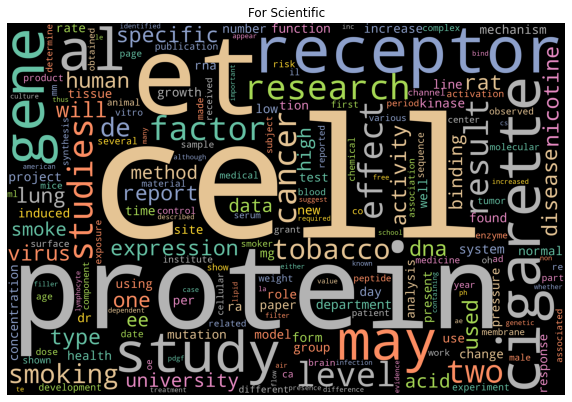

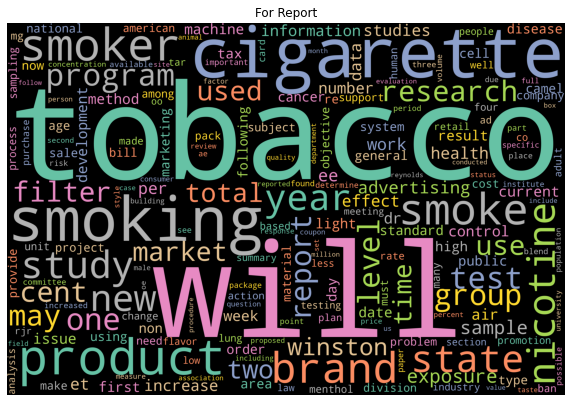

In [ ]:
for label in tqdm(labels):
  wordcloud_text = " ".join(imgpath_text_df[imgpath_text_df['label']==label]['clean_text'])
  wordcloud = WordCloud(width = 3000,
                        height = 2000,
                        random_state=1,
                        background_color='black',
                        colormap='Set2',
                        collocations=False,
                        stopwords = STOPWORDS).generate(wordcloud_text)
  # Plotting the word cloud
  wordcloud_plot(wordcloud,label)